In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# Let's import the data
col = ['NUM_RINGS_RISK','NUM_DISTRESS','LAUNCH_TEMP_F','PRESS_PSI','TEMPORAL_ORDER']
ring = pd.read_csv('o-ring-erosion-or-blowby.csv',delim_whitespace=True,names=col)

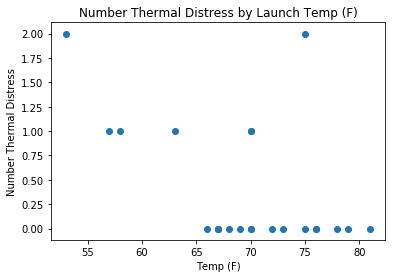

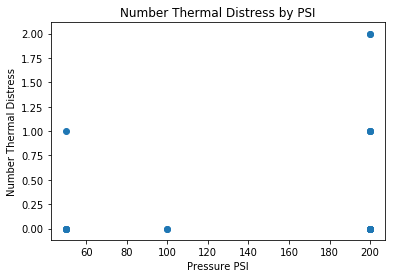

In [152]:
# Check for linearity between independent variables and dependent variable (Number experiencing thermal distress/'NUM_DISTRESS')
# Ignore num_rings_risk and temporal_order
plt.scatter(ring['LAUNCH_TEMP_F'],ring['NUM_DISTRESS'])
plt.title('Number Thermal Distress by Launch Temp (F)')
plt.xlabel('Temp (F)')
plt.ylabel('Number Thermal Distress')
plt.show()

plt.scatter(ring['PRESS_PSI'],ring['NUM_DISTRESS'])
plt.title('Number Thermal Distress by PSI')
plt.xlabel('Pressure PSI')
plt.ylabel('Number Thermal Distress')
plt.show()


In [70]:
ring.corr()

,NUM_RINGS_RISK,NUM_DISTRESS,LAUNCH_TEMP_F,PRESS_PSI,TEMPORAL_ORDER
NUM_RINGS_RISK,NaN,NaN,NaN,NaN,NaN
NUM_DISTRESS,NaN,1.000000,-0.511126,0.284666,0.173578
LAUNCH_TEMP_F,NaN,-0.511126,1.000000,0.039818,0.230770
PRESS_PSI,NaN,0.284666,0.039818,1.000000,0.839932
TEMPORAL_ORDER,NaN,0.173578,0.230770,0.839932,1.000000


In [71]:
# Define x and y for the model
x = ring[['LAUNCH_TEMP_F','PRESS_PSI']]
y = ring['NUM_DISTRESS']

In [72]:
# Add a constant to x
x = sm.add_constant(x)

In [73]:
model = sm.OLS(y, x).fit()
predict = model.predict(x)

In [74]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           NUM_DISTRESS   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Mon, 23 Jul 2018   Prob (F-statistic):             0.0126
Time:                        21:36:32   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.3298      1.188      2.803

In [139]:
def calculate_distress(temp,psi_start,psi_end):
    results = pd.DataFrame()
    psi = psi_start
    while psi <= psi_end:
        y = (3.3298)+(-0.0487)*temp+(0.0029)*psi
        results = results.append(pd.DataFrame({'PSI':[psi], 'TEMP_F':[temp], 'NUM_DISTRESS':[round(y)]}))
        psi = psi + 50
    return results

In [155]:
calculate_distress(31,0,200)

,NUM_DISTRESS,PSI,TEMP_F
0,2,0,31
0,2,50,31
0,2,100,31
0,2,150,31
0,2,200,31
